In [180]:
from ema_workbench.analysis import prim
import pysubgroup as ps
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ema_workbench.analysis import cart

def generate_data(number_of_data_points, number_of_dimensions):
    # Generate n x m matrix of random points in [0, 1]
    x = np.random.rand(number_of_data_points, number_of_dimensions)
    
    # Generate a vector of n random labels (0 or 1)
    y = np.random.choice([0, 1], number_of_data_points, replace=True)
    y = pd.DataFrame(y)
    
    indexes = []
    
    for i in range(number_of_dimensions):
        indexes.append('x'+ str(i))    
    
    data = pd.DataFrame(x, columns=indexes)
    data.insert(number_of_dimensions, 'y', y)
    
    # Return as a dictionary
    return data



In [194]:
data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

#data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Bryant et al 2010.csv')

#data = generate_data(3000, 20)

In [182]:
def visualize_precision_and_recall(precision, recall):

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(precision, recall, c='blue', marker='o')

    plt.xlim(0, 1.1)
    plt.ylim(0, 1.1)

    # Add labels and a legend
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision vs. Recall')
    plt.legend()

    # Display the plot
    plt.grid(True)
    return plt

In [183]:
def data_preprocessing(data, package, name_data):
    if name_data == 'bryant':
        if package == 'pysubgroup':
            y = ps.BinaryTarget('Greater than 90%', True)
            x = ps.create_selectors(data, ignore={'Less than 10%', 'Greater than 90%'})
        else:
            if package == 'ema_workbench':
                y = data['Greater than 90%']
                temp_data = pd.DataFrame(data.drop(columns=['Less than 10%', 'Greater than 90%']))
                x = temp_data.values
    else:
        if name_data == 'rozenberg':
            if package == 'pysubgroup':
                y = ps.BinaryTarget('SSP1', True)
                x = ps.create_selectors(data, ignore={'SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'})
            else:
                if package == 'ema_workbench':
                    y = data['SSP1']
                    temp_data = pd.DataFrame(data.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
                    x = temp_data.values
        else:
            if name_data == 'generated':
                if package == 'pysubgroup':
                    y = ps.BinaryTarget('y', True)
                    x = ps.create_selectors(data, ignore={'y'})
                else:
                    if package == 'ema_workbench':
                        y = data['y']
                        temp_data = pd.DataFrame(data.drop(columns=['y']))
                        x = temp_data.values
    
    return x, y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


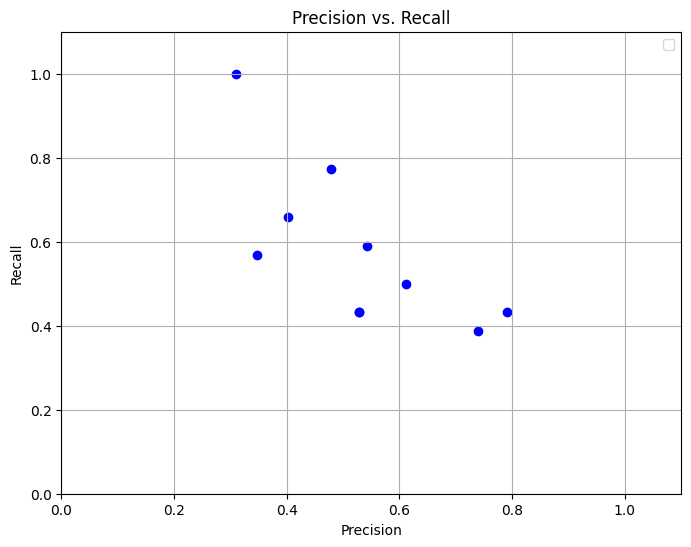

In [198]:
#result_set_size is number of sg which should be created
#if a new subgroup is created and we already have result_set_size subgroups its added if the quality is higher than the one of the lowest quality added yet
#TODO: whats about parameter depth
x, y = data_preprocessing(data, 'pysubgroup', 'rozenberg')
task = ps.SubgroupDiscoveryTask(data, y, x, result_set_size=10, depth=400, qf=ps.WRAccQF())
result = ps.DFS().execute(task).to_dataframe()
#Recall in this statistics is meant by coverage_sg
#Target_share_sg means Precision

visualize_precision_and_recall(result['target_share_sg'], result['coverage_sg']).show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


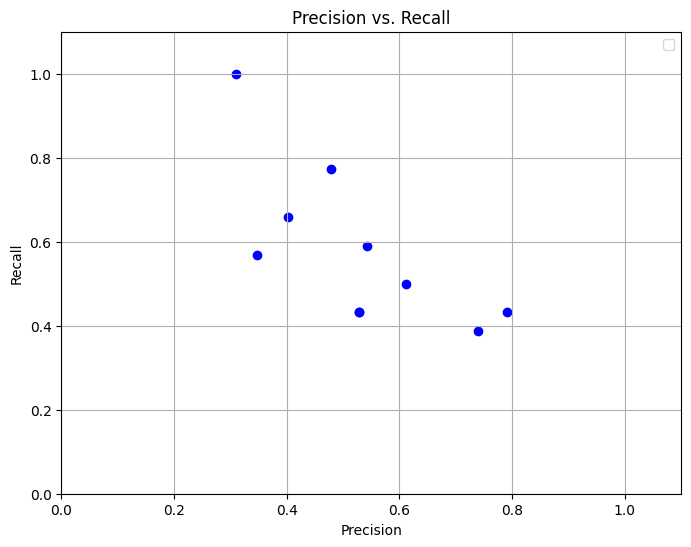

In [199]:
result = ps.BeamSearch(beam_width=100).execute(task).to_dataframe()
visualize_precision_and_recall(result['target_share_sg'], result['coverage_sg']).show()

/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/pysubgroup/binary_target.py:356: RuntimeWarning: invalid value encountered in divide
  p_subgroup = np.divide(positives_subgroup, instances_subgroup)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


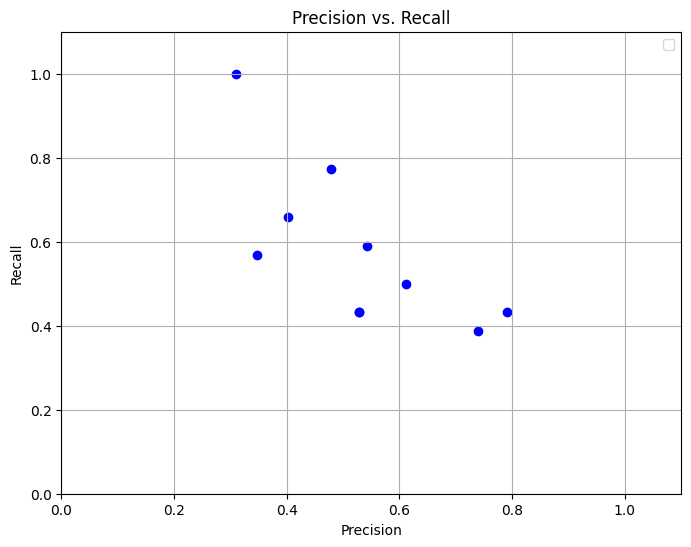

In [200]:
result = ps.Apriori().execute(task).to_dataframe()
visualize_precision_and_recall(result['target_share_sg'], result['coverage_sg']).show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

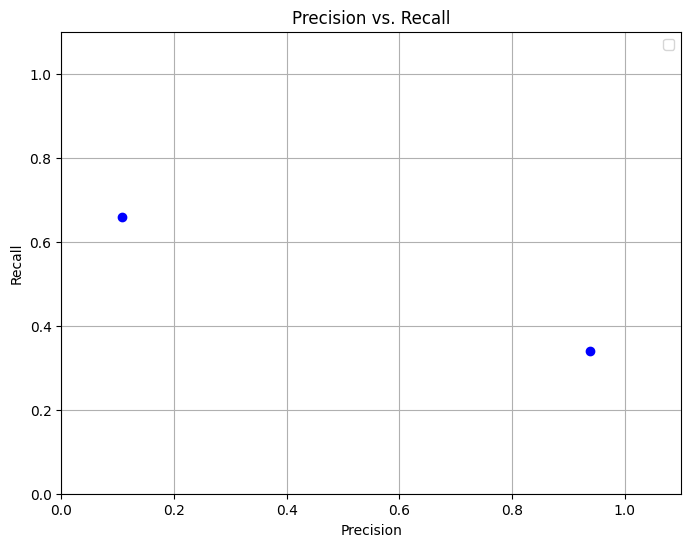

In [201]:
prec = []
rec = []

x, y = data_preprocessing(data, 'ema_workbench', 'rozenberg')
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box = prim_alg.find_box()

while box is not None:
    prec.append(box.density)
    rec.append(box.coverage)
    box = prim_alg.find_box()
    
visualize_precision_and_recall(prec, rec)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       coverage  density  res dim      mass
box 1  0.000000   0.0000        1  0.503497
box 2  0.000000   0.0000        4  0.108392
box 3  0.227273   0.6250        4  0.055944
box 4  0.159091   0.4375        4  0.055944
box 5  0.204545   0.6000        5  0.052448
box 6  0.340909   0.9375        5  0.055944
box 7  0.000000   0.0000        3  0.083916
box 8  0.068182   0.1250        3  0.083916


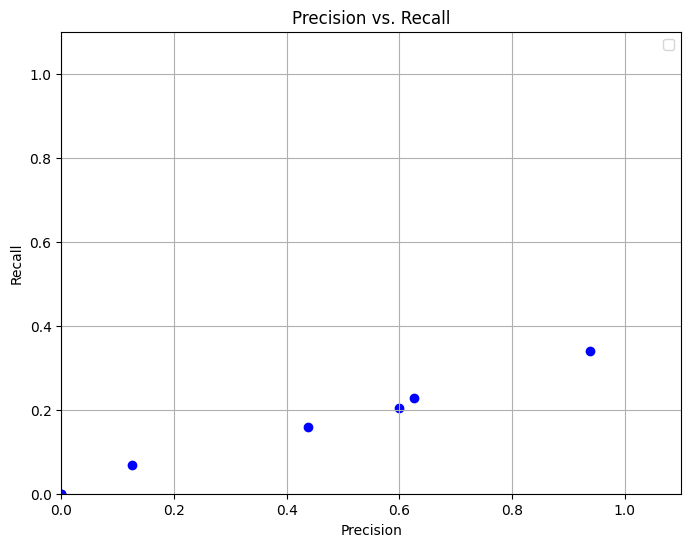

In [202]:
prec = []
rec = []

x, y = data_preprocessing(data, 'ema_workbench', 'rozenberg')
cart_alg = cart.CART(x, y)
cart_alg.build_tree()

df_stats = cart_alg.stats_to_dataframe()

prec = df_stats['density'].tolist()
rec = df_stats['coverage'].tolist()

print(df_stats)
    
visualize_precision_and_recall(prec, rec).show()